<a href="https://colab.research.google.com/github/ormorteey/STA-237-Time-Series/blob/main/Copy_of_STA_237_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
p_load(tidyverse, googledrive, readxl, forecast)

In [3]:
drive_deauth()
drive_user()
public_file = drive_get(as_id("1K3YlAT53AFVVYnFw1R9Y6Q84YO29mFmz"))
gdrive_file = drive_download(public_file, overwrite = TRUE)

ℹ Not logged in as any specific Google user.

File downloaded:

• accidents.xlsx <id: 1K3YlAT53AFVVYnFw1R9Y6Q84YO29mFmz>

Saved locally as:

• accidents.xlsx



In [4]:
data_df = read_excel("accidents.xlsx", col_names = FALSE)
data_df_reserve = data_df
colnames(data_df) = "monthly_acc"
data_df = cbind(month_id = 1:nrow(data_df), data_df)
head(data_df)

New names:
* `` -> ...1



,month_id,monthly_acc
,<int>,<dbl>
1,1,9007
2,2,8106
3,3,8928
4,4,9137
5,5,10017
6,6,10826


## Question 2

### **Plotting Time Series**

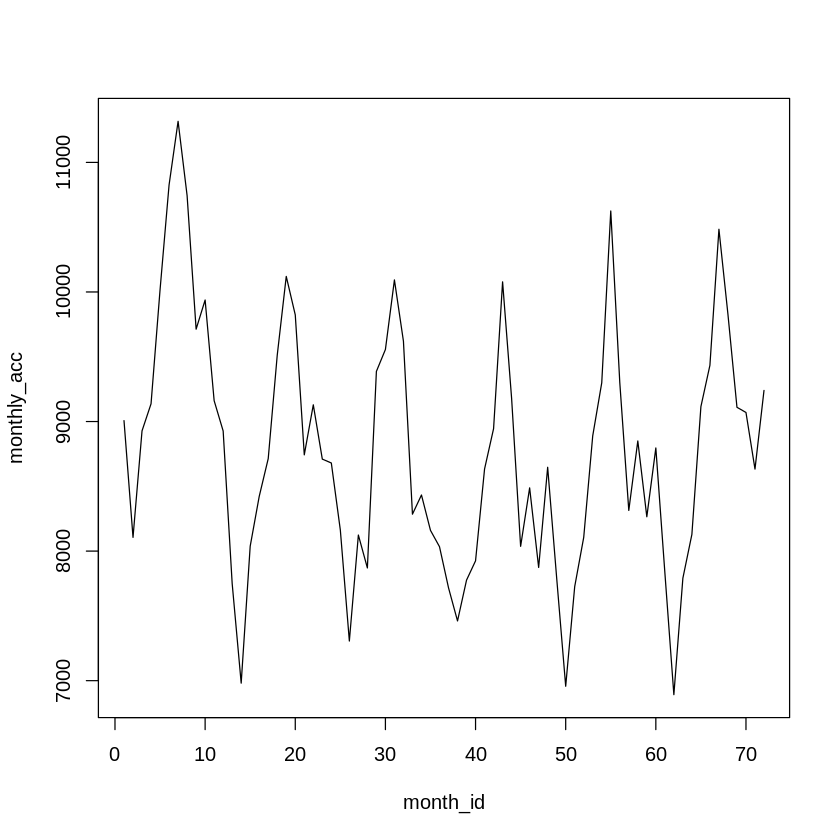

In [5]:
plot(monthly_acc ~ month_id, data_df, type = 'l')

### **Estimating Seasonality**

In [6]:
data_ts = ts(data = data_df$monthly_acc, start = c(1973,1), frequency = 12)
decomposed_data_ts = decompose(data_ts)

In [7]:
decomposed_data_ts$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,-804.31944,-1521.73611,-737.46944,-525.81111,343.42222,746.41389,1679.96389,986.83889,-108.76944,258.30556,-259.37778,-57.46111
1974,-804.31944,-1521.73611,-737.46944,-525.81111,343.42222,746.41389,1679.96389,986.83889,-108.76944,258.30556,-259.37778,-57.46111
1975,-804.31944,-1521.73611,-737.46944,-525.81111,343.42222,746.41389,1679.96389,986.83889,-108.76944,258.30556,-259.37778,-57.46111
1976,-804.31944,-1521.73611,-737.46944,-525.81111,343.42222,746.41389,1679.96389,986.83889,-108.76944,258.30556,-259.37778,-57.46111
1977,-804.31944,-1521.73611,-737.46944,-525.81111,343.42222,746.41389,1679.96389,986.83889,-108.76944,258.30556,-259.37778,-57.46111
1978,-804.31944,-1521.73611,-737.46944,-525.81111,343.42222,746.41389,1679.96389,986.83889,-108.76944,258.30556,-259.37778,-57.46111


### **Plotting deseasoned data**

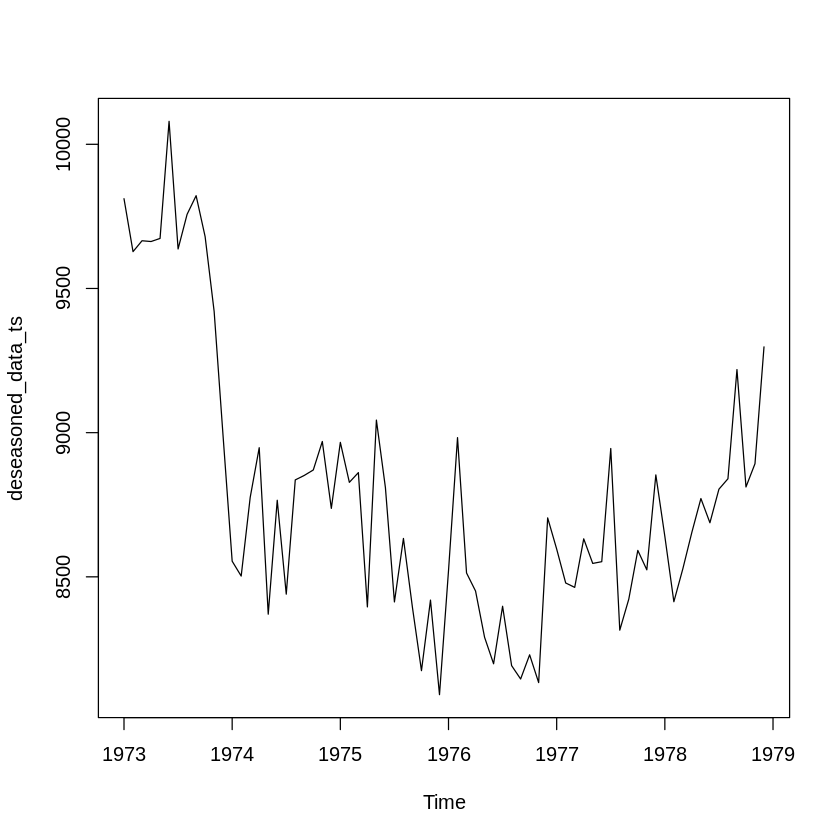

In [8]:
deseasoned_data_ts = decomposed_data_ts$x - decomposed_data_ts$seasonal
plot.ts(deseasoned_data_ts)

### **Fit A Suitable Polynomial**

In [9]:
time_data_df = data.frame(t1 = I(data_df$month_id), t2 = I(data_df$month_id^2) , t3 = I(data_df$month_id^3), t4 = I(data_df$month_id^4))

In [10]:
lm_fit_order_1 <- lm(deseasoned_data_ts ~ t1, time_data_df )
lm_fit_order_2 <- lm(deseasoned_data_ts ~ t1 + t2, time_data_df)
lm_fit_order_3 <- lm(deseasoned_data_ts ~ t1 + t2 + t3, time_data_df)
lm_fit_order_4 <- lm(deseasoned_data_ts ~ t1 + t2 + t3 + t4, time_data_df)
anova(lm_fit_order_1, lm_fit_order_2, test = "Chisq")
anova(lm_fit_order_2, lm_fit_order_3, test = "Chisq")
anova(lm_fit_order_1, lm_fit_order_3, test = "Chisq")
anova(lm_fit_order_2, lm_fit_order_4, test = "Chisq")

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,70,11805259,NA,NA,NA
2,69,4477784,1,7327475,2.255616e-26


,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,69,4477784,NA,NA,NA
2,68,4463371,1,14413.5,0.6393513


,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,70,11805259,NA,NA,NA
2,68,4463371,2,7341889,5.141472e-25


,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,69,4477784,NA,NA,NA
2,67,4418817,2,58967.45,0.6395152


#### We choose polynomial of order 2

#### **We estimate the trend**

1        2        3        4        5        6 
9880.831 9811.492 9743.805 9677.770 9613.387 9550.656

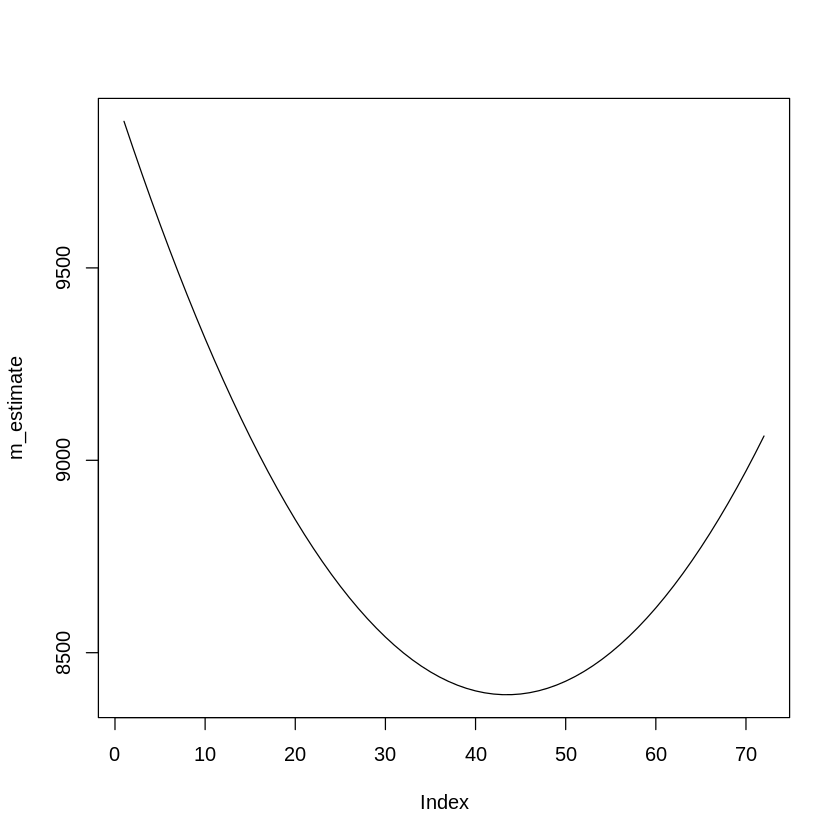

In [26]:
m_estimate = fitted.values(lm_fit_order_2)
head(m_estimate)
plot(m_estimate, type = "l")

### **Plotting Residuals**

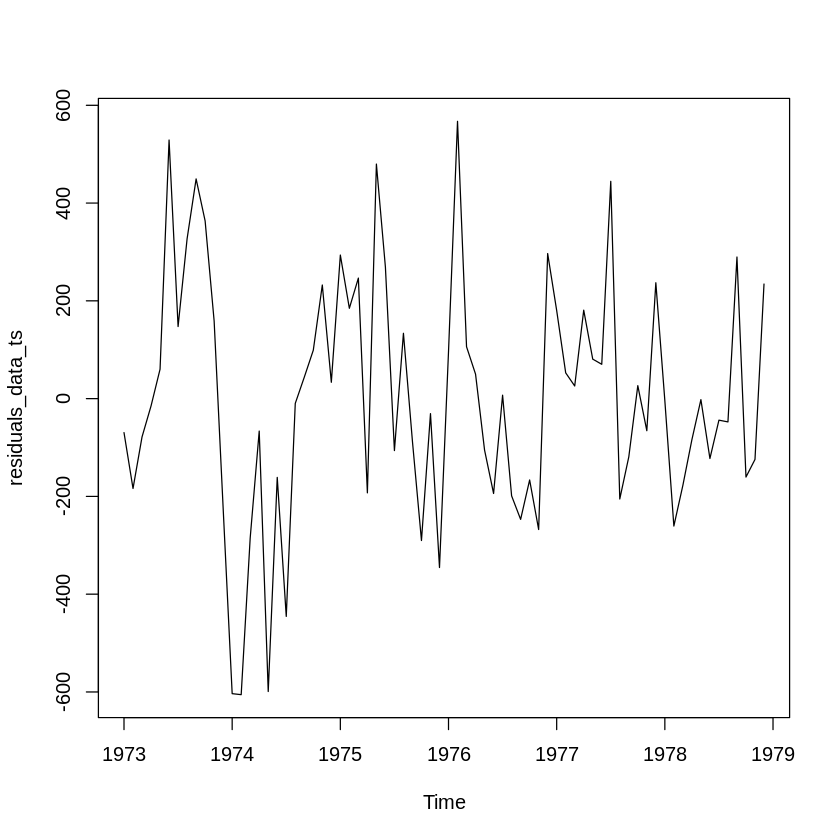

In [12]:
residuals_data_ts = decomposed_data_ts$x - m_estimate - decomposed_data_ts$seasonal
plot(residuals_data_ts, type = "l")

In [13]:
length(residuals_data_ts)

[1] 72

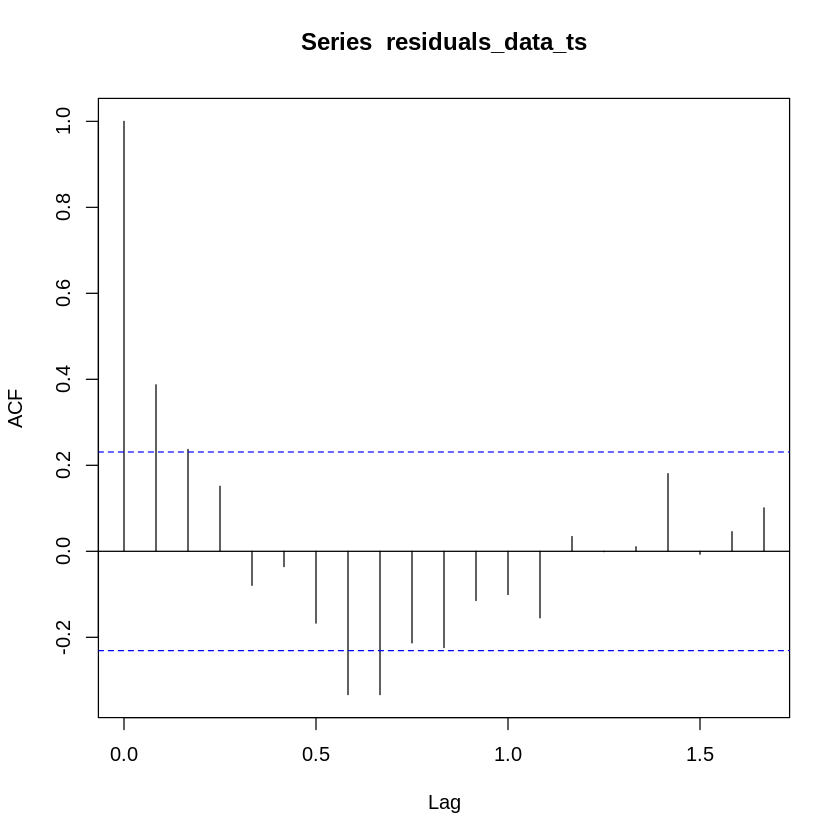

In [14]:
acf(residuals_data_ts, lag.max = 20)

### **Predicting with fitted model**

In [27]:
new_vec = 73:84
new_data_df = c()
new_data_df = cbind(new_vec, new_vec^2) %>% as.data.frame()
colnames(new_data_df) = c("t1","t2")
t(new_data_df)

t1,73,74,75,76,77,78,79,80,81,82,83,84
t2,5329,5476,5625,5776,5929,6084,6241,6400,6561,6724,6889,7056


In [28]:
predict_data_ts = predict(lm_fit_order_2, new_data_df)
predict_data_ts %>% as.data.frame() %>% t()

,1,2,3,4,5,6,7,8,9,10,11,12
.,9111.041,9160.649,9211.909,9264.821,9319.385,9375.602,9433.47,9492.99,9554.163,9616.987,9681.464,9747.592


## Question 3

#### Method 1 (The Sample ACF)

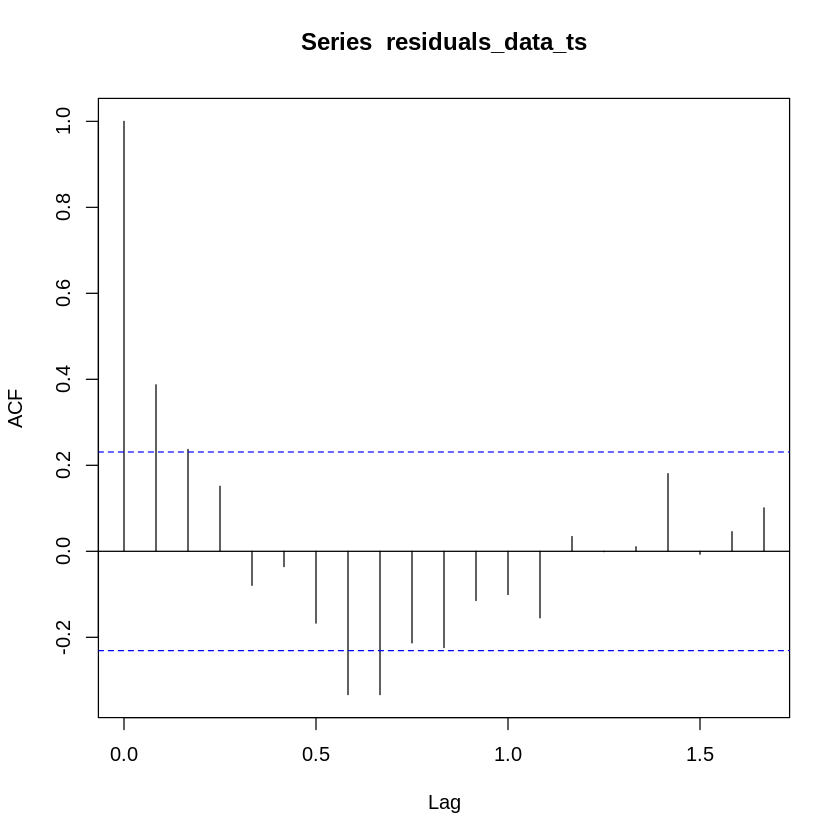

In [17]:
acf(residuals_data_ts, lag.max = 20)

We reject the null

### Method 2 (The Portmanteau Test)

In [18]:
acf_residuals = acf(residuals_data_ts, lag.max = 20, plot = FALSE)
acf_residuals
acf_vec_sqrd = acf_residuals$acf^2 %>% data.frame()



Autocorrelations of series ‘residuals_data_ts’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.387  0.237  0.151 -0.079 -0.036 -0.167 -0.333 -0.333 -0.213 -0.224 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 
-0.114 -0.101 -0.155  0.034 -0.001  0.011  0.181 -0.007  0.046  0.101 

[1] 1.675556

In [19]:
nn = length(residuals_data_ts)
nn

[1] 72

In [20]:
Q_portmanteau = nn * sum(acf_vec_sqrd)
Q_portmanteau
Q_portmanteau > qchisq(p=.05, df=20, lower.tail=FALSE)

[1] 120.64

[1] TRUE

We reject the null

### Method 3 (The Rank Test)

In [21]:
# Rank Test
# n = length(residuals_data_ts)

# # All possible pairs of residuals
# temp <- t(combn(residuals_data_ts, 2))

# # Pairs where i is greater than j
# pairs <- nrow(temp[temp[,1] > temp[,2], ])

# # Rank test - test statistic
# P = abs(pairs - (1/4) * n * (n - 1)) / (sqrt((1/72)* n * (n - 1) * (2 * n + 5)))
# P

In [22]:
resid_df = data.frame(id = 1:nn, resids = residuals_data_ts)
pi_pairs = data.frame(id_j = NA, resid_j = NA, id_i = NA, resid_i = NA)
head(resid_df)
pi_pairs_count = 1
for(i in 2:nn){
 for(j in 1:i){
   if(resid_df[i,2] > resid_df[j,2]){
     res = c(j, resid_df[j,2], i, resid_df[i,2])
     pi_pairs[pi_pairs_count,] = res
     pi_pairs_count = pi_pairs_count + 1
   }
 }
}
head(pi_pairs)
tail(pi_pairs)

,id,resids
,<int>,<dbl>
1,1,-69.51142
2,2,-183.75565
3,3,-78.33526
4,4,-14.95858
5,5,60.19106
6,6,528.93032


,id_j,resid_j,id_i,resid_i
,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-183.75565,3,-78.33526
2,1,-69.51142,4,-14.95858
3,2,-183.75565,4,-14.95858
4,3,-78.33526,4,-14.95858
5,1,-69.51142,5,60.19106
6,2,-183.75565,5,60.19106


,id_j,resid_j,id_i,resid_i
,<dbl>,<dbl>,<dbl>,<dbl>
1240,65,-2.071894,72,234.3764
1241,66,-122.455295,72,234.3764
1242,67,-44.049074,72,234.3764
1243,68,-47.619897,72,234.3764
1244,70,-160.434343,72,234.3764
1245,71,-124.402966,72,234.3764


In [23]:
Pbn = abs(nrow(pi_pairs) - ((1/4) * nn * (nn - 1))) / sqrt((1/72) * nn * (nn - 1) * (2 * nn + 5))
Pbn > qnorm(0.975)

[1] FALSE

We fail to reject the null

### Method 4 (Test For Normality)

In [24]:
p_load(car)

[1] 14 13

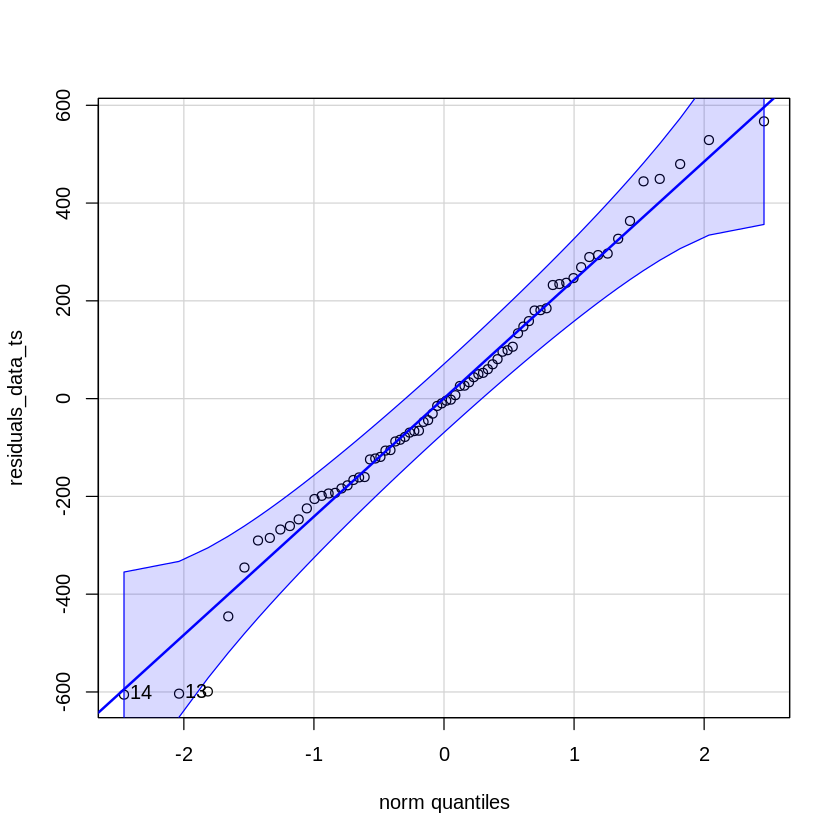

In [25]:

qqPlot(residuals_data_ts)

We fail to reject the null